## Visualizing and cleaning dataset tables

In [1]:
import numpy as np
import pandas as pd

data = pd.read_table('movies.dat' ,sep  ="::", engine='python')
users = pd.read_table('ratings.dat' , sep='::' , engine='python')
users.drop(users[users['UserID'] > 1200].index, inplace = True)
users.drop(columns='Timestap', axis=1)


,UserID,MovieID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
194537,1200,2762,5
194538,1200,1999,3
194539,1200,3753,3
194540,1200,3917,4


In [2]:
print(data)

         0                    Movie Name(Year)                         Genre
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
...    ...                                 ...                           ...
3878  3948             Meet the Parents (2000)                        Comedy
3879  3949          Requiem for a Dream (2000)                         Drama
3880  3950                    Tigerland (2000)                         Drama
3881  3951             Two Family House (2000)                         Drama
3882  3952               Contender, The (2000)                Drama|Thriller

[3883 rows x 3 columns]


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
avr_row = list(range(1, 1201))
cols = [1 ,2] 
avg_plot = pd.DataFrame(0, index=avr_row, columns=cols)
for index, row in users.iterrows():
    avg_plot.at[row['UserID'],1] +=1
    
print(avg_plot)  

        1  2
1      53  0
2     129  0
3      51  0
4      21  0
5     198  0
...   ... ..
1196  112  0
1197   24  0
1198  102  0
1199  179  0
1200   39  0

[1200 rows x 2 columns]


## Plot below shows no. of movies rated by every user

<AxesSubplot:>

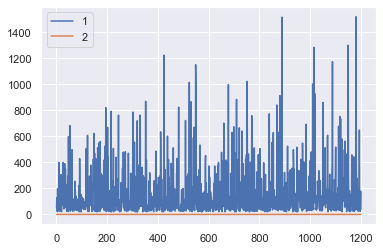

In [15]:
avg_plot.plot()

In [3]:
columns = list(range(1, 1201))
rows =list(range(1, 3960))
Y = pd.DataFrame(0, index=rows, columns=columns)
R = pd.DataFrame(0, index=rows, columns=columns)
for index, row in users.iterrows():
    Y.at[row['MovieID'],row['UserID']] = row['Rating']
    R.at[row['MovieID'],row['UserID']] = 1   


## Cost function

In [9]:
##Cost function
def cofiCostFunc(params, Y, R, num_users, num_movies,
                      num_features,lambda_=0.0 ):
    print("Training the Model plz wait")
    """
    Collaborative filtering cost function.
    
    Parameters
    ----------
    params : array_like
        The parameters which will be optimized. This is a one
        dimensional vector of shape (num_movies x num_users, 1). It is the 
        concatenation of the feature vectors X and parameters Theta.

    Returns
    -------
    J : float
        The value of the cost function at the given params.
    
    grad : array_like
        The gradient vector of the cost function at the given params.
        grad has a shape (num_movies x num_users, 1)
    
    """
    # Unfold the U and W matrices from params
    X = params[:num_movies*num_features].reshape(num_movies, num_features)
    Theta = params[num_movies*num_features:].reshape(num_users, num_features)

    # You need to return the following values correctly
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)

    # ====================== YOUR CODE HERE ======================
    J =np.sum(np.multiply(R ,(X.dot(Theta.T) - Y)**2)/2)
    
    J+= (lambda_/2)*(np.sum(Theta**2)+np.sum(X**2)) 
    
    for i in range(num_movies):
        idx = np.where(R[i, :] == 1)[0]
        Theta_temp = Theta[idx, :]
        Y_temp = Y[i, idx]
        X_grad[i, :] = np.dot(np.dot(X[i, :], Theta_temp.T) - Y_temp, Theta_temp) + (X[i ,:]*lambda_)
        
    for j in range(num_users):

        Theta_temp = Theta[j , :]
        Theta_grad[j,:]+= lambda_*Theta_temp
        for i in range(num_movies):
            if R[i , j]==1:
                Theta_grad[j , :]+= np.dot(np.dot(Theta_temp ,X[i]) - Y[ i , j] , X[i])
     
    # =============================================================
    
    grad = np.concatenate([X_grad.ravel(), Theta_grad.ravel()])
    return J, grad

## Training the model

In [10]:
from scipy import optimize
#  Now, you will train the collaborative filtering model on a movie rating 
#  dataset of 1682 movies and 943 users

#  Load data
# data = loadmat(os.path.join('Data', 'ex8_movies.mat'))
# Y, R = data['Y'], data['R']

#  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies by 
#  943 users

#  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a
#  rating to movie i

#  Add our own ratings to the data matrix

# Y = np.hstack([my_ratings[:, None], Y])
# R = np.hstack([(my_ratings > 0)[:, None], R])

#  Normalize Ratings
# Ynorm, Ymean = utils.normalizeRatings(Y, R)

#  Useful Values
num_movies, num_users = Y.shape
num_features = 5

# Set Initial Parameters (Theta, X)
X = np.random.rand(num_movies, num_features)
Theta = np.random.randint(1,6 , (num_users, num_features))

initial_parameters = np.concatenate([X.ravel(), Theta.ravel()])

# Set options for scipy.optimize.minimize
options = {'maxiter': 110}
count = 0;
# Set Regularization
lambda_ = 1
res = optimize.minimize(lambda x: cofiCostFunc(x, Y, R, num_users,
                                               num_movies, num_features,lambda_ ),
                        initial_parameters,
                        method='TNC',
                        jac=True,
                        options=options)
theta = res.x

# Unfold the returned theta back into U and W
X = theta[:num_movies*num_features].reshape(num_movies, num_features)
Theta = theta[num_movies*num_features:].reshape(num_users, num_features)

print('Recommender system learning completed.')

Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model plz wait
Training the Model p

In [4]:
Y=Y.to_numpy()
R=R.to_numpy()

## TOP 5 movie recommendetion for user no. t 

In [11]:
# np.sum(X[0]*Theta[0])
t = 5
arr = X.dot(Theta[t])
np.sort(arr)
print(np.sort(arr))
pred  =np.argsort(arr)[0:6:1]
print("We reccomend user", t , "These Movies")
print('--------------------------')
for i in pred:
    try:
        print(data.loc[i,'Movie Name(Year)'])
    except:
        print('This movie no. is not available in data:(')

[0.63565773 0.65781798 0.68333849 ... 5.37764234 5.43408165 5.46568026]
We reccomend user 5 These Movies
--------------------------
Crows and Sparrows (1949)
Meatballs III (1987)
Fury, The (1978)
Highlander: Endgame (2000)
Cutter's Way (1981)
No Way Out (1987)


In [8]:
Theta

array([[ 2.19386594,  1.19025907,  1.25064353,  1.95066886,  0.74723954],
       [ 1.93948813,  1.09873188,  0.82566541,  1.75808626,  1.36810867],
       [ 1.5231576 ,  2.02946615,  0.45843561,  1.81021942,  1.00609567],
       ...,
       [ 1.38785342,  1.54286723,  1.45548903,  0.62262907,  1.35931013],
       [ 2.70015422,  1.08040814,  1.31347032,  1.83782368,  0.55786076],
       [-0.32732359,  0.180528  ,  2.53673963,  1.84736526,  3.01147454]])

In [16]:
Y

array([[5, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
X

array([[ 0.39022365,  0.70404112,  0.62054667,  0.75097224,  0.42864136],
       [ 0.68701814,  0.51601236, -0.19386243,  1.00722855,  0.35153855],
       [ 0.53664925,  0.38272054,  0.73981638,  0.64242158,  0.03133486],
       ...,
       [ 0.45317769,  0.19160711,  0.40395667,  0.30842045,  0.35171005],
       [ 0.39678111,  0.20183767,  0.44493758,  0.39495597,  0.08584594],
       [ 0.5369368 ,  0.19473139,  0.37657583,  0.35674678,  0.41395921]])

In [23]:
R

array([[1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
np.sqrt(np.sum((Y.T - R.T*Theta.dot(X.T))**2)/73870)

0.7732945073637887